# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r'd:\programming\Git&Github\Cubicals\PredictingStudentExamPerformance\Datasets\data.csv')
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [3]:
df.isnull().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

In [4]:
x = df.drop(['Grades'], axis=1)
y = df['Grades']

In [5]:
x.head()
x.columns


Index(['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)'], dtype='object')

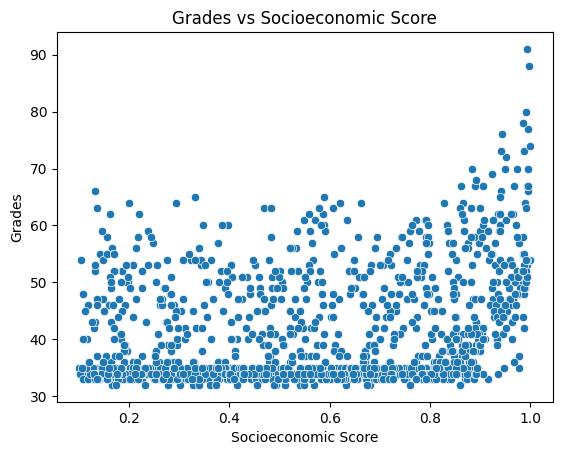

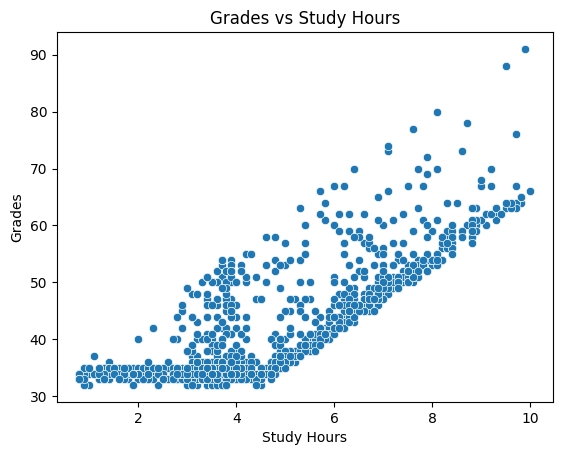

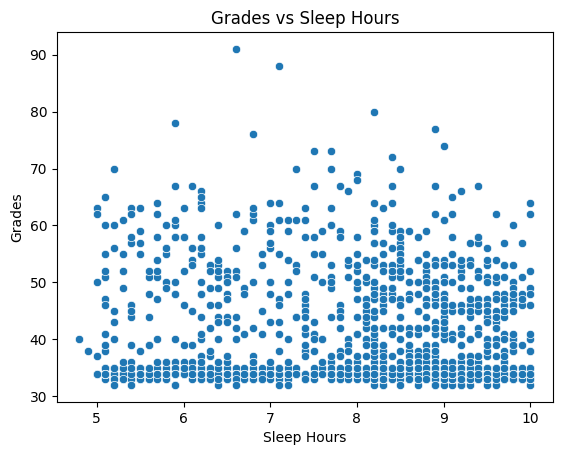

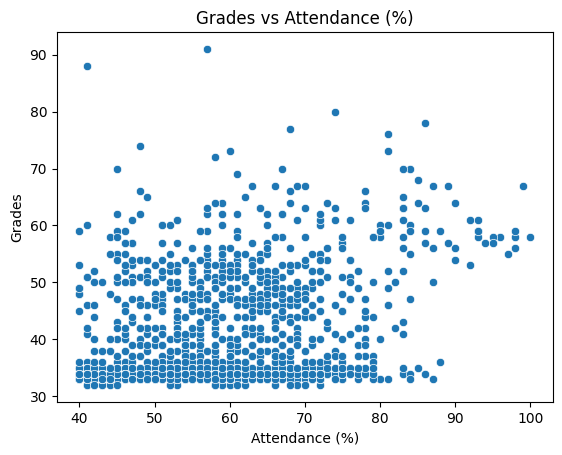

In [6]:
for column in x.columns:
    plt.figure()
    sns.scatterplot(x=df[column], y=df['Grades'])
    plt.title(f'Grades vs {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Grades')
    plt.show()

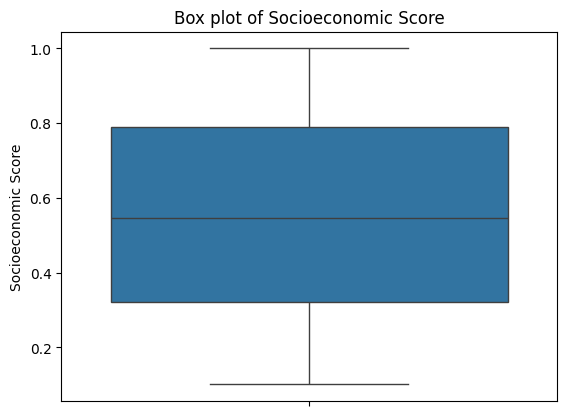

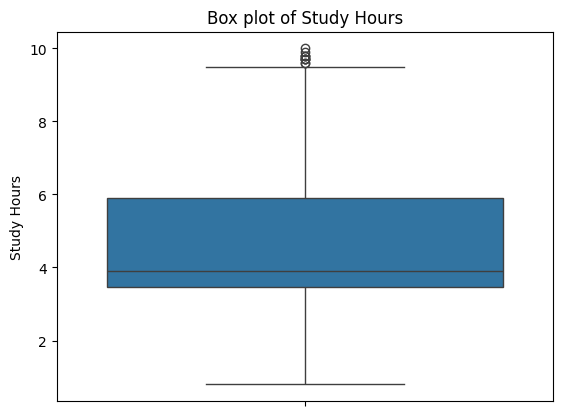

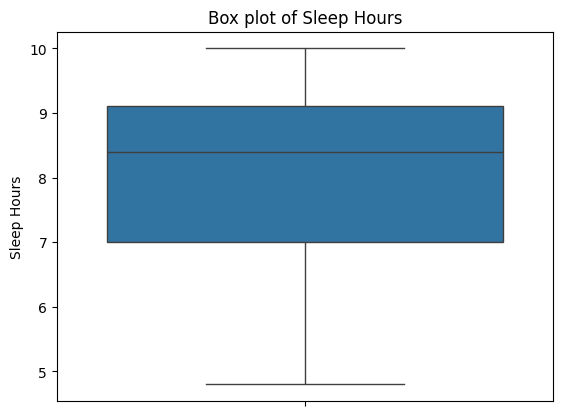

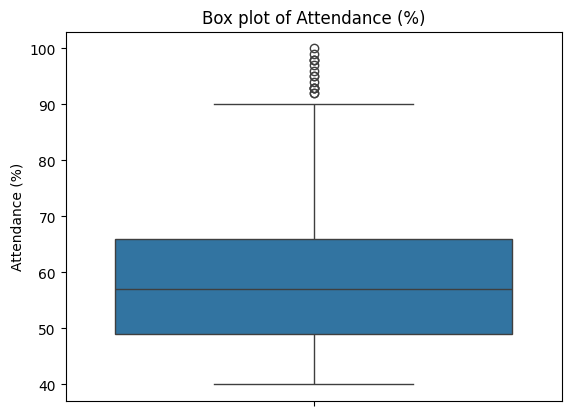

In [7]:
for column in x.columns:
    plt.figure()
    sns.boxplot(data=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [8]:
for col in ['Study Hours', 'Attendance (%)']:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.98)
    df[col] = df[col].clip(lower, upper)


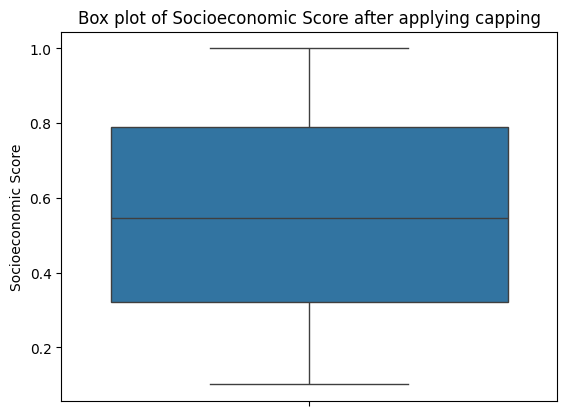

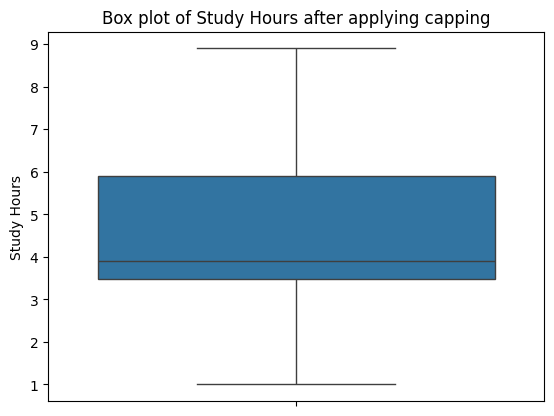

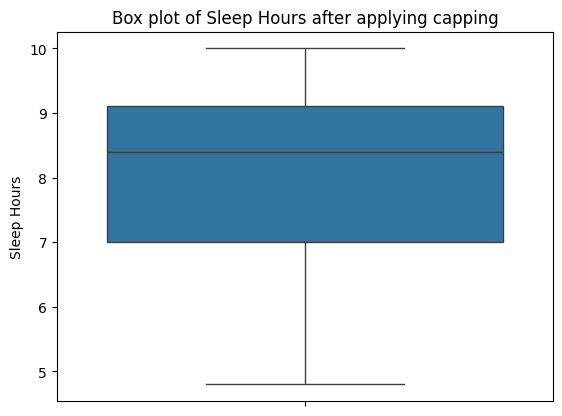

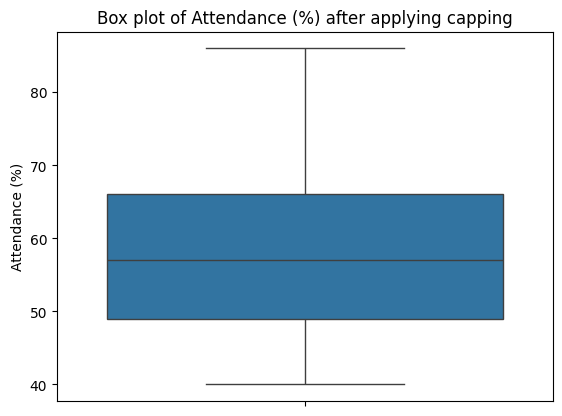

In [9]:
for column in x.columns:
    plt.figure()
    sns.boxplot(data=df[column])
    plt.title(f'Box plot of {column} after applying capping')
    plt.show()

In [10]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert the scaled array back into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

In [12]:
final_df = pd.concat([x_scaled_df,y],axis=1)
final_df.to_csv(r'D:\programming\Git&Github\Cubicals\PredictingStudentExamPerformance\Datasets\cleanded_data.csv',index=False)